In [1]:
import torch
import numpy as np


w2v_emb = np.load("gensim_embeddings/wikitext_word2vec_embeddings.npy")
w2v_emb_alpha15 = np.load("gensim_embeddings/wikitext_word2vec-alpha-1.5_embeddings.npy")
w2v_emb_alpha12 = np.load("gensim_embeddings/wikitext_word2vec-alpha-1.2_embeddings.npy")
w2v_emb_alpha20 = np.load("gensim_embeddings/wikitext_word2vec-alpha-2.0_embeddings.npy")

# w2v_emb = np.load("gensim_embeddings/wikitext10_word2vec10_embeddings.npy")
# w2v_emb_alpha15 = np.load("gensim_embeddings/wikitext15_word2vec15_embeddings.npy")
# w2v_emb_alpha12 = np.load("gensim_embeddings/wikitext12_word2vec12_embeddings.npy")

gpt_emb = torch.load("wikitext_gpt2_embeddings.pt").to('cpu').detach().numpy().copy()
gpt_emb_alpha12 = torch.load("wikitext-alpha-1.2_gpt2_embeddings.pt").to('cpu').detach().numpy().copy()
gpt_emb_alpha15 = torch.load("wikitext-alpha-1.5_gpt2_embeddings.pt").to('cpu').detach().numpy().copy()
gpt_emb_alpha20 = torch.load("wikitext-alpha-2.0_gpt2_embeddings.pt").to('cpu').detach().numpy().copy()
bert_emb = torch.load("wikitext_bert_embeddings.pt").to("cpu").detach().numpy().copy()
simcse_emb = torch.load("wikitext_simcse_embeddings.pt").to("cpu").detach().numpy().copy()
tfidf_emb = np.load("wikitext_tfidf_embeddings.npy")


/tmp/ipykernel_1789669/2279610873.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gpt_emb = torch.load("wikitext_gpt2_embeddings.pt").to('cpu').detach().numpy().copy()


In [2]:
from sklearn.decomposition import PCA

def compute_eigenvalues(embeddings):
    pca = PCA()
    pca.fit(embeddings)
    return pca.explained_variance_    

#w2v_eigenvalues = compute_eigenvalues(w2v_emb)
#w2v_alpha15_eigenvalues = compute_eigenvalues(w2v_emb_alpha15)
#w2v_alpha12_eigenvalues = compute_eigenvalues(w2v_emb_alpha12)

w2v_eigenvalues = compute_eigenvalues(w2v_emb)
w2v_alpha15_eigenvalues = compute_eigenvalues(w2v_emb_alpha15)
w2v_alpha12_eigenvalues = compute_eigenvalues(w2v_emb_alpha12)
w2v_alpha20_eigenvalues = compute_eigenvalues(w2v_emb_alpha20)

gpt_eigenvalues = compute_eigenvalues(gpt_emb)
# gpt_alpha12_eigenvalues = compute_eigenvalues(gpt_emb_alpha12)
# gpt_alpha15_eigenvalues = compute_eigenvalues(gpt_emb_alpha15)
gpt_alpha20_eigenvalues = compute_eigenvalues(gpt_emb_alpha20)
#bert_eigenvalues = compute_eigenvalues(bert_emb)
#simcse_eigenvalues = compute_eigenvalues(simcse_emb)
#tfidf_eigenvalues = compute_eigenvalues(tfidf_emb)


Slope coefficient for WikiText: -1.3713763279947147
Slope coefficient for 単語刈り込みWikiText: -1.770470476991516


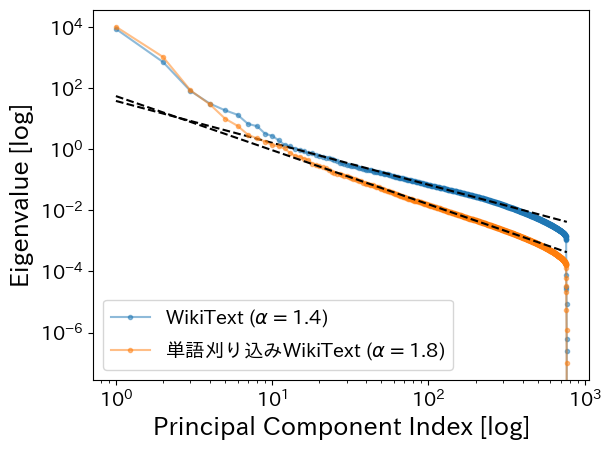

In [18]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def plot_eigenvalues(eigenvalues, ax, label="", bulk_ratio=None, start_point=1, show_slope=True):
    indices = np.arange(1, len(eigenvalues) + 1)
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]

    start_index = max(start_point, 1)  # start_pointが1未満の場合を防ぐためにmaxを使用
    bulk = int(len(eigenvalues) * bulk_ratio) if bulk_ratio is not None else len(eigenvalues)
    
    # 指定された範囲のインデックスと固有値に基づいて傾きを計算
    slope, intercept = np.polyfit(np.log(indices[start_index-1:bulk]), np.log(sorted_eigenvalues[start_index-1:bulk]), 1)

    # 元のプロット
    ax.loglog(indices, sorted_eigenvalues, '.-', label=fr"{label} ($\alpha=${-slope:.2})", alpha=0.5)
    if show_slope:
        # 補助線をグラフ全体に延長してプロット
        ax.loglog(indices, np.exp(intercept) * indices ** slope, 'k--')


    print(f"Slope coefficient for {label}: {slope}")

fig, ax = plt.subplots()

#plot_eigenvalues(w2v_eigenvalues, ax, "WikiText", start_point=10, bulk_ratio=0.9)
#plot_eigenvalues(w2v_alpha12_eigenvalues, ax, "Word2Vec-alpha=1.2", start_point=10, bulk_ratio=0.6)
#plot_eigenvalues(w2v_alpha15_eigenvalues, ax, "Word2Vec-alpha=1.5", start_point=10, bulk_ratio=0.6)
#plot_eigenvalues(w2v_alpha20_eigenvalues, ax, "単語刈り込みWikiText", start_point=10, bulk_ratio=0.6)

plot_eigenvalues(gpt_eigenvalues, ax, "WikiText", start_point=10, bulk_ratio=0.5)
# plot_eigenvalues(gpt_alpha12_eigenvalues, ax, "GPT-2-alpha=1.2", start_point=10, bulk_ratio=0.5)
# plot_eigenvalues(gpt_alpha15_eigenvalues, ax, "GPT-2-alpha=1.5", start_point=10, bulk_ratio=0.5)
plot_eigenvalues(gpt_alpha20_eigenvalues, ax, "単語刈り込みWikiText", start_point=10, bulk_ratio=0.5)
#plot_eigenvalues(bert_eigenvalues, ax, "BERT", start_point=10, bulk_ratio=0.3)
#plot_eigenvalues(tfidf_eigenvalues, ax, "TF-IDF", start_point=10, bulk_ratio=0.1)

#plot_eigenvalues(simcse_eigenvalues, ax, "SimCSE", start_point=100, bulk_ratio=0.8)

ax.set_xlabel("Principal Component Index [log]", fontsize=18)
ax.set_ylabel("Eigenvalue [log]", fontsize=18)
ax.legend(prop={'size': 14}, loc='lower left')
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_xlim(10, 1e3)
#ax.set_ylim(1e-4, 1e2)


plt.savefig("compare_gpt2_embeddings.png", bbox_inches='tight', dpi=300)
plt.show()


Slope coefficient for SimCSE: -2.4931993296594217
Slope coefficient for TF-IDF: -0.772018611095638


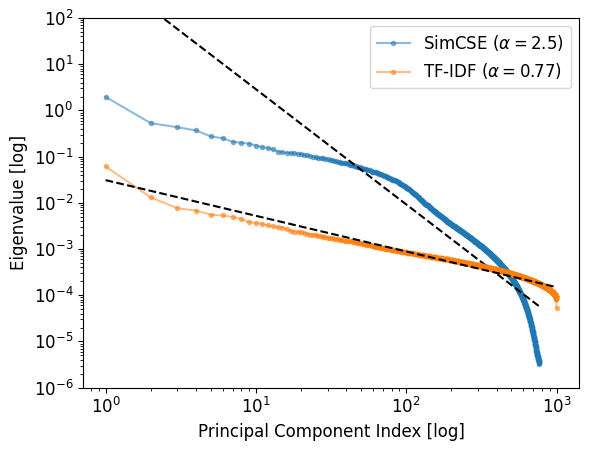

In [25]:
fig, ax = plt.subplots()


plot_eigenvalues(simcse_eigenvalues, ax, "SimCSE")
plot_eigenvalues(tfidf_eigenvalues, ax, "TF-IDF")

ax.set_xlabel("Principal Component Index [log]", fontsize=12)
ax.set_ylabel("Eigenvalue [log]", fontsize=12)
ax.legend(prop={'size': 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlim(10, 1e3)
ax.set_ylim(1e-6, 1e2)

plt.savefig("text_embeddings_eigenvalues.pdf")
plt.show()


In [26]:
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset
import numpy as np

# WikiTextデータセットのロード
dataset = load_dataset("wikitext", "wikitext-2-raw-v1", split="train")

# 単語頻度のカウント
word_counts = Counter()
for sentence in dataset['text']:
    words = sentence.split()
    word_counts.update(words)

# 単語を頻度順にソート
sorted_word_counts = sorted(word_counts.values(), reverse=True)

# 頻度順にソートした順位（ランク）
ranks = np.arange(1, len(sorted_word_counts) + 1)



Slope coefficient for Word Frequency: -0.9766822129804315


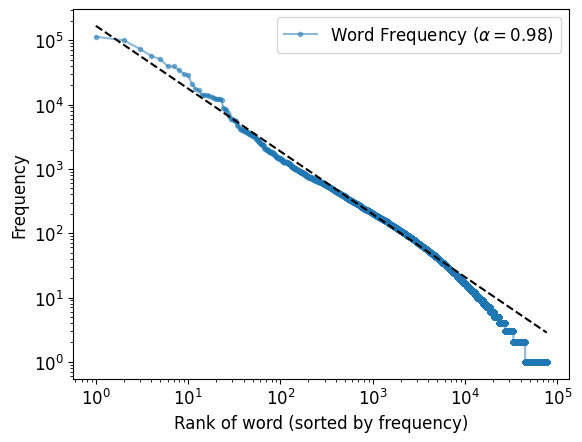

In [27]:
fig, ax = plt.subplots()
plot_eigenvalues(sorted_word_counts, ax, "Word Frequency", start_point=10, bulk_ratio=0.1)
ax.set_xlabel("Rank of word (sorted by frequency)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.legend(prop={'size': 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlim(10, 1e3)
#ax.set_ylim(1e-4, 1e2)
plt.show()


In [28]:
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset
from transformers import GPT2Tokenizer, BertTokenizer
import numpy as np

# WikiTextデータセットのロード
dataset = load_dataset("wikitext", "wikitext-2-raw-v1", split="train")

# トークナイザーのロード
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
#bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 単語頻度のカウント
#word_counts = Counter()
gpt2_token_counts = Counter()
#bert_token_counts = Counter()#

for sentence in dataset['text']:
    # 単語カウント
    #words = sentence.split()
    #word_counts.update(words)
    
    # GPT-2トークンカウント
    gpt2_tokens = gpt2_tokenizer.tokenize(sentence)
    gpt2_token_counts.update(gpt2_tokens)
    
    # BERTトークンカウント
    #bert_tokens = bert_tokenizer.tokenize(sentence)
    #bert_token_counts.update(bert_tokens)


gpt_sorted_counts = sorted(gpt2_token_counts.values(), reverse=True)
gpt_ranks = np.arange(1, len(gpt_sorted_counts) + 1)


/home/shinzato/git/text_power_raw/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Slope coefficient for Word: -0.9766822129804315
Slope coefficient for BPE Tokenizer: -0.8828399768638897


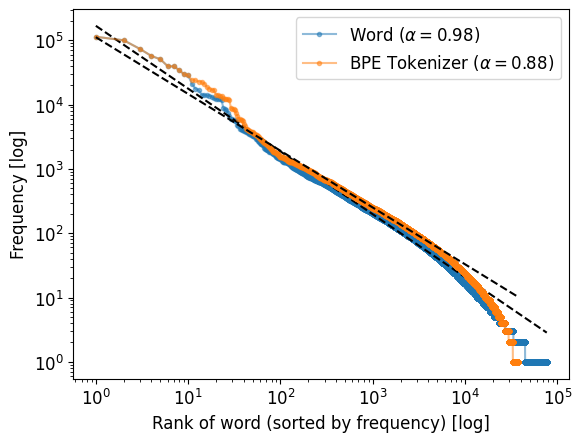

In [29]:
fig, ax = plt.subplots()
plot_eigenvalues(sorted_word_counts, ax, "Word", start_point=10, bulk_ratio=0.1)
plot_eigenvalues(gpt_sorted_counts, ax, "BPE Tokenizer", start_point=10, bulk_ratio=0.1)
ax.set_xlabel("Rank of word (sorted by frequency) [log]", fontsize=12)
ax.set_ylabel("Frequency [log]", fontsize=12)
ax.legend(prop={'size': 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#ax.set_xlim(10, 1e3)
#ax.set_ylim(1e-4, 1e2)
plt.show()
